Если с бинарной классификацией ирисов более-менее понятно, то как быть, если классов больше, чем два? А вот как.

In [ ]:
# Будем работать с датасетом ирисов.
# Если вы еще не знаете про ирисы, то описание тут:
# https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
# Возьмем три класса ирисов и всего один признак.
x_train = iris.data[:, 1:2]
y_train = iris.target
print(x_train[:5])
print(y_train)
# Вот так выглядят тренировочные данные.

[[3.5]
 [3. ]
 [3.2]
 [3.1]
 [3.6]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
import matplotlib.pyplot as plt

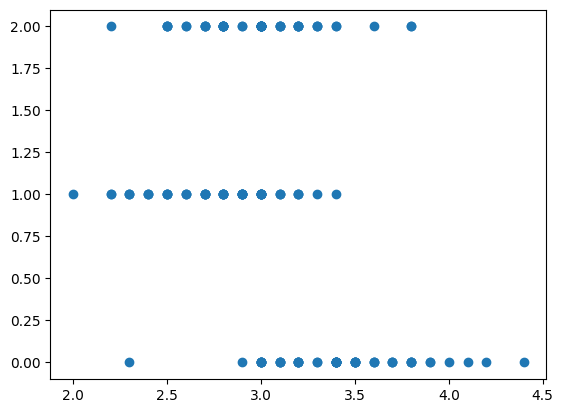

In [ ]:
plt.scatter(x_train, y_train)
# А теперь посмотрим на распределение этого признака:
# нулевой и второй класс находятся правее, чем первый класс.
# Лучше всего стоило бы приближать их не прямой, а кривой
# в форме буквы С.

In [ ]:
# Линейную регрессию будем рассчитывать при помощи библиотеки scikit-learn.
# https://scikit-learn.org/
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_train)

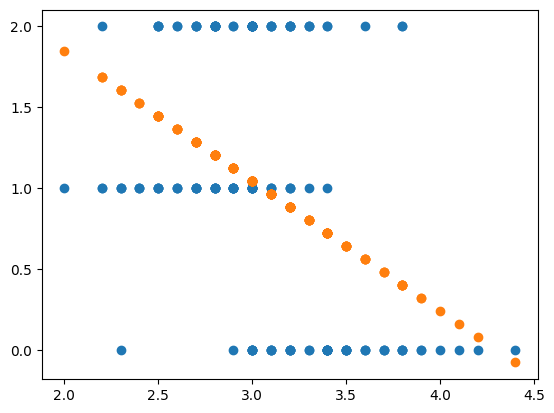

In [ ]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, predicted)
# В итоге наша прямая не очень-то и напоминает распределение признаков.
# Она через массивы точек-то почти и не проходит.

In [ ]:
from sklearn import metrics

In [ ]:
# Преобразуем предсказанные значения в лейблы класса.
class_labels = [round(x) for x in predicted]
# И напечатаем итог.
print(class_labels)
print(list(y_train))
# Второй класс вообще почти весь мимо кассы.
# Да и с нулевым результат не очень.
# Оценим результат через метрику accuracy.
print(metrics.accuracy_score(y_train, class_labels))
# Совсем фу какое-то: ~0.37.
# А теперь попробуем классифицировать их по отдельности.

[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
0.36666666666666664


In [ ]:
# Используем метод один-против-всех - one-versus-all -
# сначала для класса 0.
model0 = linear_model.LinearRegression()
model0.fit(x_train, [0]*50+[1]*100)
predicted = model0.predict(x_train)
class_labels = [round(x) for x in predicted]
print(class_labels)
# Сильно больше нулей среди первых пятидесяти экземпляров,
# которые реально относятся к классу 0, чем было выше.
# И accuracy прям взлетело:
print(metrics.accuracy_score([0]*50+[1]*100, class_labels))

[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
0.8333333333333334


In [ ]:
# Теперь тот же метод используем для класса 1.
model1 = linear_model.LinearRegression()
model1.fit(x_train, [0]*50+[1]*50+[0]*50)
predicted = model1.predict(x_train)
class_labels = [round(x) for x in predicted]
print(class_labels)
# А вот так выглядят изначальные лейблы классов.
print([0]*50+[1]*50+[0]*50)
# Картина примерно такая: в середине единички, по бокам нули.
# Опять же лучше, чем было. И accuracy:
print(metrics.accuracy_score([0]*50+[1]*50+[0]*50, class_labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.7266666666666667


In [ ]:
# Теперь попробуем one-versus-one для классов 1 и 2,
# т.к. между ними самый замес и был.
model12 = linear_model.LinearRegression()
model12.fit(x_train[50:], [1]*50+[2]*50)
predicted = model12.predict(x_train[50:])
class_labels = [round(x) for x in predicted]
print(class_labels)
# Выглядит чето не очень. Ииии accuracy:
print(metrics.accuracy_score([1]*50+[2]*50, class_labels))
# Ну все-таки лучше, чем 0.37

[2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2]
0.58


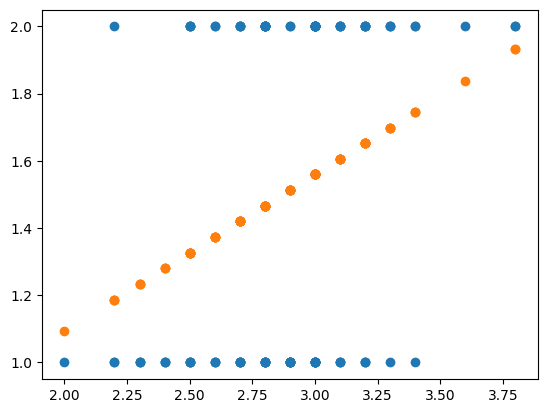

In [ ]:
# Вот такая регрессия у этих замешавшихся классов - не очень красиво выглядит.
plt.scatter(x_train[50:], [1]*50+[2]*50)
plt.scatter(x_train[50:], predicted)

И учтите: я ни в одном методе не доделала в итоге полностью сравнение между тремя классами, т.к. там много кода надо дописать. Если бы доделала, то, возможно, результат accuracy был бы еще лучше, чем промежуточные результаты, которые я привела.

Кстати, вот и задача на тренировку навыка программиования: сделайте код для более умной многоклассовой линейной регрессии, чем это позволяет scikit-learn 😉